   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171     7.25   NaN        S  
1      0          PC 17599  712.833   C85        C  
2      0  STON/O2. 3101282    7.925   NaN        S  
3      0            113803     53.1  C123        S  
4      0            373450    08.05   NaN        S  
<c

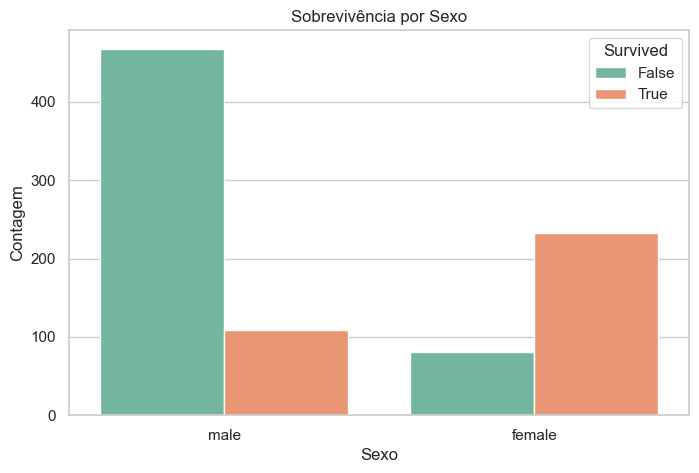

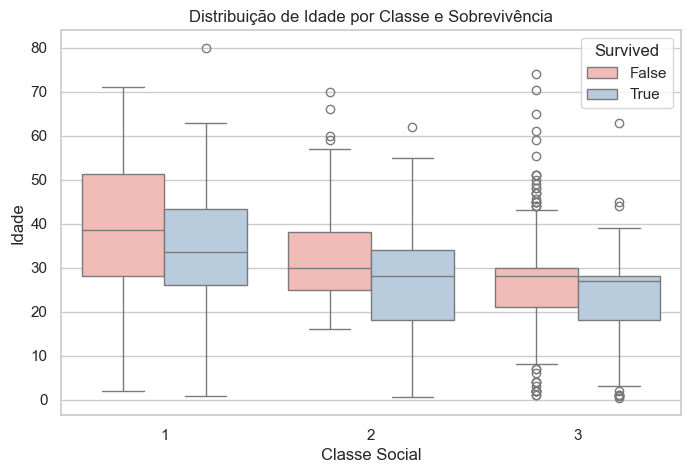

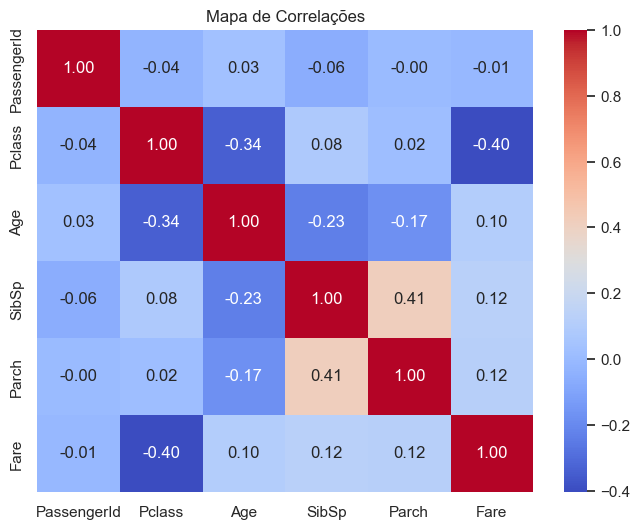

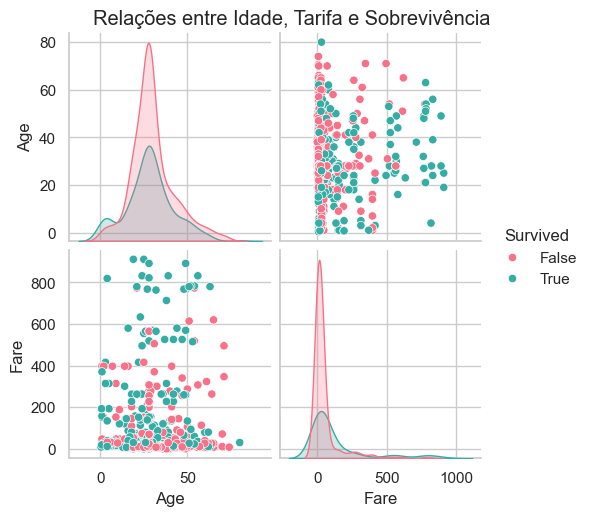

In [1]:
# Bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Carregando dataset
df = pd.read_csv('Mikael Krug - Titanic - Mikael Krug - Titanic.csv')

# Parte 1
print(df.head())
print(df.info())
print(df.describe())
print(df['Sex'].value_counts())
print(df['Embarked'].value_counts())
print(df.isnull().sum())

# Parte 2 - Limpeza de dados
df = df.drop_duplicates()

# >>> Garantir tipos numéricos onde necessário (corrige o erro do median) <<<
for col in ['Age', 'Fare', 'Pclass', 'Survived']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Preenchimentos após coerção
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

if 'Embarked' in df.columns and not df['Embarked'].mode().empty:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Opcional: Survived como booleano de forma segura (True apenas para 1)
if 'Survived' in df.columns:
    df['Survived'] = (df['Survived'] == 1)

# Remover colunas desnecessárias se existirem
cols_to_drop = ['deck', 'embark_town', 'alive', 'who', 'adult_male', 'alone']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

print(df.isnull().sum())

# Parte 3 - Transformações e agrupamentos
def categorize_age(age):
    if pd.isna(age):
        return 'Desconhecido'
    if age < 18:
        return 'Criança'
    elif age < 60:
        return 'Adulto'
    else:
        return 'Idoso'

df['faixa_etaria'] = df['Age'].apply(categorize_age)

survivors = df[df['Survived'] == True]
print(survivors.head())

# >>> Agrupamento com named agg (mais legível) <<<
grouped = (
    df.groupby(['Pclass', 'Sex'], as_index=False)
      .agg(Survived=('Survived', 'mean'),
           Age=('Age', 'mean'),
           Fare=('Fare', 'median'))
)
print(grouped)

print(df.sort_values(by='Fare', ascending=False).head())

# Parte 4 - Visualizações
sns.set(style='whitegrid')

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set2')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.title('Sobrevivência por Sexo')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Pclass', y='Age', hue='Survived', palette='Pastel1')
plt.title('Distribuição de Idade por Classe e Sobrevivência')
plt.xlabel('Classe Social')
plt.ylabel('Idade')
plt.show()

# Correlação — pega qualquer dtype numérico (inclui Int64)
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlações')
plt.show()

# Relações entre variáveis
sns.pairplot(df, vars=['Age', 'Fare'], hue='Survived', palette='husl')
plt.suptitle('Relações entre Idade, Tarifa e Sobrevivência', y=1.02)
plt.show()
